# Motivation
I wanted to start my first Machine Learning project from a dataset that is real-world data, specifically my [Whoop](www.whoop.com) data since March.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Motivation" data-toc-modified-id="Motivation-1">Motivation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.0.1">Imports</a></span></li><li><span><a href="#Data-reading" data-toc-modified-id="Data-reading-1.0.2">Data reading</a></span></li><li><span><a href="#Filtering" data-toc-modified-id="Filtering-1.0.3">Filtering</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-1.0.4">Data Cleaning</a></span></li><li><span><a href="#Inspecting-the-data" data-toc-modified-id="Inspecting-the-data-1.0.5">Inspecting the data</a></span></li></ul></li><li><span><a href="#Data-visualisation" data-toc-modified-id="Data-visualisation-1.1">Data visualisation</a></span><ul class="toc-item"><li><span><a href="#HRV-(heart-rate-variability)-v-Recovery-Score" data-toc-modified-id="HRV-(heart-rate-variability)-v-Recovery-Score-1.1.1">HRV (heart rate variability) v Recovery Score</a></span></li><li><span><a href="#RHR-(resting-heart-rate)-vs.-Recovery-Score" data-toc-modified-id="RHR-(resting-heart-rate)-vs.-Recovery-Score-1.1.2">RHR (resting heart rate) vs. Recovery Score</a></span></li><li><span><a href="#Sleep-score-vs.-Recovery-Score" data-toc-modified-id="Sleep-score-vs.-Recovery-Score-1.1.3">Sleep score vs. Recovery Score</a></span></li></ul></li><li><span><a href="#Basic-data-analysis" data-toc-modified-id="Basic-data-analysis-1.2">Basic data analysis</a></span></li><li><span><a href="#Machine-Learning---Neural-Network" data-toc-modified-id="Machine-Learning---Neural-Network-1.3">Machine Learning - Neural Network</a></span></li></ul></li></ul></div>

### Imports
Let's get the usual imports out of the way...

In [1]:
import pandas as pd # data processing, visualising the data
import numpy as np # linear algebra
import os

import seaborn as sns # visualisation
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

# machine learning imports
from sklearn.model_selection import train_test_split

/Users/philip_p/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Data reading

In [2]:
# read the data file (#TODO: move the data to a data directory)
initial_data = pd.read_csv("../../../Documents/whoop/2020-12-05 Habit Dash (flat file).csv")
# look at the data
initial_data.head(5)

,source,date,field,value
0,garmin,2019-10-08,garmin_stressdetails_stresslevel_avg,32.913907
1,garmin,2019-10-08,garmin_stressdetails_bodybattery_avg,63.006173
2,garmin,2019-10-08,garmin_dailies_averageheartrateinbeatsperminute,85.000000
3,garmin,2019-10-08,garmin_dailies_distanceinmeters,25487.000000
4,garmin,2019-10-08,garmin_dailies_moderateintensitydurationinseconds,2400.000000


In [3]:
# look at the end of the data
initial_data.tail(5)

,source,date,field,value
14593,whoop,2020-12-05,whoop_sleep_duration_rem_percent,19.656522
14594,whoop,2020-12-05,whoop_sleep_end_standardized,6.833333
14595,garmin,2020-12-05,garmin_dailies_highstressdurationinseconds,0.000000
14596,whoop,2020-12-05,whoop_sleep_respiratory_rate,17.168000
14597,garmin,2020-12-05,garmin_stressdetails_bodybattery_avg,80.379310


In [4]:
initial_data['source'].unique()

array(['garmin', 'whoop'], dtype=object)

### Filtering
We can see there are two different values for 'source' column of this data, _'whoop'_ and _'garmin'_. 
We'd like to filter the data only for the _'whoop'_ data.

In [5]:
whoop_data = initial_data.loc[initial_data['source'] == 'whoop'].copy(True)

Check the size of the dataset, as well as the shape and columns.

In [6]:
print(f"{whoop_data.shape[0]} rows in data set")
print(f"{whoop_data.shape[1]} columns in data set")


7488 rows in data set
4 columns in data set


In [7]:
whoop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7488 entries, 3124 to 14596
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  7488 non-null   object 
 1   date    7488 non-null   object 
 2   field   7488 non-null   object 
 3   value   7488 non-null   float64
dtypes: float64(1), object(3)
memory usage: 292.5+ KB


 Having seen above, we will inspect the values for the _'field'_ column.

In [8]:
whoop_data['field'].unique()

array(['whoop_strain_avghr', 'whoop_strain_calories',
       'whoop_workout_duration', 'whoop_strain_maxhr',
       'whoop_workout_count', 'whoop_strain_score',
       'whoop_sleep_duration_light_percent', 'whoop_sleep_duration_awake',
       'whoop_sleep_duration_deep_percent',
       'whoop_sleep_disturbances_per_hour',
       'whoop_sleep_respiratory_rate', 'whoop_sleep_score_total',
       'whoop_sleep_end_standardized', 'whoop_sleep_disturbances',
       'whoop_sleep_awake_percent', 'whoop_recovery_rhr',
       'whoop_sleep_start_standardized', 'whoop_sleep_duration_rem',
       'whoop_nap_count', 'whoop_sleep_cycles', 'whoop_recovery_hrv',
       'whoop_sleep_duration_total_asleep',
       'whoop_sleep_duration_total_inbed', 'whoop_sleep_latency',
       'whoop_sleep_asleep_percent', 'whoop_sleep_duration_light',
       'whoop_recovery_score', 'whoop_sleep_duration_deep',
       'whoop_nap_duration_total_asleep',
       'whoop_sleep_duration_rem_percent',
       'whoop_sleep_scor

### Data Cleaning

We can immediately remove the prefix _'whoop_'_ from the 'field' column, and make the feature names more meaningful.
Furthermore, we no longer need the _'source'_ column.

In [9]:
new_field_name_map = {nm: nm.replace("whoop_", "") for 
                      nm in whoop_data['field'].unique()}
# {'whoop_strain_avghr': 'strain_avghr',
#  'whoop_strain_calories': 'strain_calories', ... etc

whoop_data['field'] = whoop_data['field'].map(new_field_name_map)

whoop_data.drop('source', axis=1, inplace=True)
whoop_data['date'] = pd.to_datetime(whoop_data['date'])

In [12]:
data_pvt = whoop_data.pivot_table(index='date',
                              columns='field')

In [13]:
# visualised the pivoted data
data_pvt.head(5)

value                                                      \
field      nap_count nap_duration_total_asleep recovery_hrv recovery_rhr   
date                                                                       
2020-03-14       NaN                       NaN          NaN          NaN   
2020-03-15       1.0                  0.842217      44.6090         58.0   
2020-03-16       NaN                       NaN      67.5831         56.0   
2020-03-17       NaN                       NaN      69.1102         57.0   
2020-03-18       1.0                  1.068157      52.0228         61.0   

                                                                    \
field      recovery_score sleep_asleep_percent sleep_awake_percent   
date                                                                 
2020-03-14            NaN                  NaN                 NaN   
2020-03-15           36.0              89.6641             10.3359   
2020-03-16           55.0              90.4115              9.5885   
2020-03-17           54.0              89.3827             10.6173   
2020-03-18           35.0              82.1691             17.8309   

                                                                        ...  \
field      sleep_cycles sleep_disturbances sleep_disturbances_per_hour  ...   
date                                                                    ...   
2020-03-14          NaN                NaN                         NaN  ...   
2020-03-15          5.0               12.0                    1.593749  ...   
2020-03-16          3.0               13.0                    1.586741  ...   
2020-03-17          3.0               15.0                    1.833763  ...   
2020-03-18          2.0                5.0                    0.965233  ...   

                                                                             \
field      sleep_respiratory_rate sleep_score_consistency sleep_score_total   
date                                                                          
2020-03-14                    NaN                     NaN               NaN   
2020-03-15                16.9043                     NaN              77.0   
2020-03-16                16.8164                     NaN              93.0   
2020-03-17                16.9336                    72.0              85.0   
2020-03-18                17.0801                    70.0              48.0   

                                                                               \
field      sleep_start_standardized strain_avghr strain_calories strain_maxhr   
date                                                                            
2020-03-14                      NaN         84.0     1607.057839        161.0   
2020-03-15                -0.866667         71.0     2029.507648        168.0   
2020-03-16                -1.383333         75.0     2500.262906        172.0   
2020-03-17                -1.966667         75.0     2616.324092        169.0   
2020-03-18                 0.666667         77.0     2218.372371        184.0   

                                                        
field      strain_score workout_count workout_duration  
date                                                    
2020-03-14    12.160080           3.0            134.7  
2020-03-15     9.830382           2.0             82.0  
2020-03-16    13.633189           5.0             93.0  
2020-03-17    13.503018           1.0             39.0  
2020-03-18    13.688683           1.0             40.0  

[5 rows x 31 columns]

In [14]:
data_pvt.tail()

value                                                      \
field      nap_count nap_duration_total_asleep recovery_hrv recovery_rhr   
date                                                                       
2020-12-01       NaN                       NaN      94.3556         49.0   
2020-12-02       NaN                       NaN      63.5048         52.0   
2020-12-03       NaN                       NaN      51.0840         54.0   
2020-12-04       NaN                       NaN      83.2675         51.0   
2020-12-05       NaN                       NaN      62.8855         56.0   

                                                                    \
field      recovery_score sleep_asleep_percent sleep_awake_percent   
date                                                                 
2020-12-01           83.0              91.0162              8.9838   
2020-12-02           43.0              95.4678              4.5322   
2020-12-03           26.0              89.8234             10.1766   
2020-12-04           71.0              90.3151              9.6849   
2020-12-05           41.0              91.6750              8.3250   

                                                                        ...  \
field      sleep_cycles sleep_disturbances sleep_disturbances_per_hour  ...   
date                                                                    ...   
2020-12-01          2.0               16.0                    1.779742  ...   
2020-12-02          5.0                7.0                    0.928666  ...   
2020-12-03          5.0               13.0                    1.663154  ...   
2020-12-04          5.0               12.0                    1.337946  ...   
2020-12-05          4.0               12.0                    1.481519  ...   

                                                                             \
field      sleep_respiratory_rate sleep_score_consistency sleep_score_total   
date                                                                          
2020-12-01                16.6992                    87.0             100.0   
2020-12-02                17.1680                    85.0              85.0   
2020-12-03                17.1680                    85.0              81.0   
2020-12-04                17.3730                    82.0              95.0   
2020-12-05                17.1680                    90.0              90.0   

                                                                               \
field      sleep_start_standardized strain_avghr strain_calories strain_maxhr   
date                                                                            
2020-12-01                -1.350000         68.0     2459.488528        183.0   
2020-12-02                -0.750000         68.0     2091.883365        175.0   
2020-12-03                -0.983333         66.0     1769.278203        155.0   
2020-12-04                -2.133333         75.0     2380.033461        163.0   
2020-12-05                -1.266667         77.0     2451.055449        179.0   

                                                        
field      strain_score workout_count workout_duration  
date                                                    
2020-12-01    15.962886           1.0        44.000000  
2020-12-02    11.933375           1.0        22.000000  
2020-12-03     6.024665           NaN              NaN  
2020-12-04    12.005501           1.0        59.083333  
2020-12-05    16.331676           3.0       120.083333  

[5 rows x 31 columns]

In [21]:
# first row has many NaNs, drop the first row
data_pvt = data_pvt.iloc[1:, :]

In [31]:
data_pvt.columns[:5]

MultiIndex([('value',                 'nap_count'),
            ('value', 'nap_duration_total_asleep'),
            ('value',              'recovery_hrv'),
            ('value',              'recovery_rhr'),
            ('value',            'recovery_score')],
           names=[None, 'field'])

The columns are multi index, so we can rename the columns dropping the first index.

In [32]:
# rename the columns
data_pvt.columns = [x[1] for x in data_pvt.columns]

In [33]:
data_pvt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2020-03-16 to 2020-12-05
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   nap_count                     13 non-null     float64
 1   nap_duration_total_asleep     13 non-null     float64
 2   recovery_hrv                  259 non-null    float64
 3   recovery_rhr                  259 non-null    float64
 4   recovery_score                259 non-null    float64
 5   sleep_asleep_percent          259 non-null    float64
 6   sleep_awake_percent           259 non-null    float64
 7   sleep_cycles                  259 non-null    float64
 8   sleep_disturbances            259 non-null    float64
 9   sleep_disturbances_per_hour   259 non-null    float64
 10  sleep_duration_awake          259 non-null    float64
 11  sleep_duration_deep           259 non-null    float64
 12  sleep_duration_deep_percent   259 non-null   

### Inspecting the data

Whoop is a wearable that is mainly geared towards optimising the recovery of the wearer/user. In this case it would make sense for the target variable to be one of the **'recovery'** variables. These targets are continuous variables, indicated by the _'float64'_ type above.

In [34]:
data_pvt.describe()

,nap_count,nap_duration_total_asleep,recovery_hrv,recovery_rhr,recovery_score,sleep_asleep_percent,sleep_awake_percent,sleep_cycles,sleep_disturbances,sleep_disturbances_per_hour,...,sleep_respiratory_rate,sleep_score_consistency,sleep_score_total,sleep_start_standardized,strain_avghr,strain_calories,strain_maxhr,strain_score,workout_count,workout_duration
count,13.0,13.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,...,259.000000,256.000000,259.000000,259.000000,260.000000,260.000000,260.000000,260.000000,216.000000,216.000000
mean,1.0,1.092399,79.009536,51.864865,59.154440,90.578213,9.421787,5.513514,11.996139,1.431093,...,16.678629,75.597656,86.915058,-1.366602,67.653846,2317.214660,165.861538,12.153435,1.754630,83.187963
std,0.0,0.379710,19.459357,3.230349,21.144741,3.572982,3.572982,1.650350,3.888462,0.425221,...,0.371180,8.467136,10.678554,0.887256,5.435066,366.140071,16.559593,3.480422,1.002312,50.558184
min,1.0,0.475380,44.001000,44.000000,11.000000,70.693100,2.099500,1.000000,2.000000,0.363784,...,15.527300,42.000000,33.000000,-2.666667,55.000000,1420.387189,105.000000,4.141509,1.000000,18.000000
25%,1.0,0.917624,65.825850,50.000000,43.000000,89.140450,7.010150,4.000000,10.000000,1.134642,...,16.406200,70.750000,81.000000,-1.916667,64.000000,2090.360301,158.750000,10.094487,1.000000,45.862500
50%,1.0,1.068157,74.564600,52.000000,58.000000,90.881600,9.118400,6.000000,12.000000,1.426237,...,16.669900,75.000000,88.000000,-1.550000,67.500000,2306.921606,172.000000,13.007995,1.000000,65.758333
75%,1.0,1.359851,90.356700,54.000000,74.500000,92.989850,10.859550,7.000000,15.000000,1.734572,...,16.933600,80.000000,95.000000,-1.083333,71.000000,2512.691205,178.000000,14.582785,2.000000,113.750000
max,1.0,1.708507,155.723000,65.000000,99.000000,97.900500,29.306900,9.000000,25.000000,2.798636,...,17.812500,94.000000,100.000000,4.466667,85.000000,4337.858509,195.000000,20.262546,7.000000,300.000000


Looking at a description of the statistics, the **recovery_score**, **strain_calories**, and **strain_maxhr** have high values for standard deviation.
If we wanted to apply a machine learning model to this data, we'd need to do some scaling (/normalisation) of the features before training and running the model.

In [35]:
# look for empty values
data_pvt.isnull().sum()

nap_count                       247
nap_duration_total_asleep       247
recovery_hrv                      1
recovery_rhr                      1
recovery_score                    1
sleep_asleep_percent              1
sleep_awake_percent               1
sleep_cycles                      1
sleep_disturbances                1
sleep_disturbances_per_hour       1
sleep_duration_awake              1
sleep_duration_deep               1
sleep_duration_deep_percent       1
sleep_duration_light              1
sleep_duration_light_percent      1
sleep_duration_rem                1
sleep_duration_rem_percent        1
sleep_duration_total_asleep       1
sleep_duration_total_inbed        1
sleep_end_standardized            1
sleep_latency                     1
sleep_respiratory_rate            1
sleep_score_consistency           4
sleep_score_total                 1
sleep_start_standardized          1
strain_avghr                      0
strain_calories                   0
strain_maxhr                

We can see from above that the data contains 30 features, not all of which are entirely useful, for example there are few observations for the nap features, so we may choose to drop these for the first analysis of the data.
Perhaps there is one day where all of the sleep stats are **null**, so let's remove this from the dataset.

In [41]:
null_sleep_data = data_pvt[(data_pvt['sleep_asleep_percent'].isnull()) & 
         (data_pvt['sleep_cycles'].isnull())]
null_sleep_data

,nap_count,nap_duration_total_asleep,recovery_hrv,recovery_rhr,recovery_score,sleep_asleep_percent,sleep_awake_percent,sleep_cycles,sleep_disturbances,sleep_disturbances_per_hour,...,sleep_respiratory_rate,sleep_score_consistency,sleep_score_total,sleep_start_standardized,strain_avghr,strain_calories,strain_maxhr,strain_score,workout_count,workout_duration
date,,,,,,,,,,,,,,,,,,,,,
2020-05-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,79.0,1420.387189,178.0,15.587924,3.0,96.0


In [43]:
null_sleep_data.index

DatetimeIndex(['2020-05-18'], dtype='datetime64[ns]', name='date', freq=None)

In [44]:
data_pvt.index

DatetimeIndex(['2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19',
               '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23',
               '2020-03-24', '2020-03-25',
               ...
               '2020-11-26', '2020-11-27', '2020-11-28', '2020-11-29',
               '2020-11-30', '2020-12-01', '2020-12-02', '2020-12-03',
               '2020-12-04', '2020-12-05'],
              dtype='datetime64[ns]', name='date', length=260, freq=None)

In [74]:
df = data_pvt.loc[~data_pvt.index.isin(null_sleep_data.index)].copy(True)

In [75]:
# see if there are still null-values
df.columns[df.isnull().any()]

Index(['nap_count', 'nap_duration_total_asleep', 'sleep_score_consistency',
       'workout_count', 'workout_duration'],
      dtype='object')

In [76]:
df['nap_count'].values[:20]

array([nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan])

Seems like for the label _'nap_count'_, on most days I did not nap, therefore it's filled in as a NaN value, but we can fill that with 0.

In [77]:
df['nap_duration_total_asleep'].values[:20]

array([       nan,        nan, 1.06815667,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan])

Similarly for the label _'nap_duration_total_asleep'_, also fill with 0.

In [78]:
df.loc[df['workout_count'].isnull()][['workout_count', 'workout_duration']].head(3)

,workout_count,workout_duration
date,,
2020-03-26,NaN,NaN
2020-04-01,NaN,NaN
2020-04-06,NaN,NaN


On the days on which I didn't workout, the _'workout_count'_ and _'workout_duration'_ is NaN, can fill with 0.

In [79]:
df.fillna({"nap_count": 0,
          "nap_duration_total_asleep": 0,
          "workout_count": 0,
          "workout_duration": 0},
         inplace=True)

Reinspect the data to look for null values.

In [80]:
df.columns[df.isnull().any()]

Index(['sleep_score_consistency'], dtype='object')

Only one category of variables remains as null values, look at the individual values, and percentage of observations that are null.

In [81]:
df['sleep_score_consistency'].values[:20]

array([nan, 72., 70., 85., 78., 75., 73., 74., 74., 87., 86., 84., 68.,
       79., 73., 76., 79., 80., 73., 70.])

In [98]:
sleep_score_consistency = df['sleep_score_consistency']
# print(f"{100*(sleep_score_consistency.isnull().sum()/len(sleep_score_consistency))}"

print(f"{100*sleep_score_consistency.isnull().sum()/len(sleep_score_consistency):.2f}%"
      f" of sleep score consistency values are null")

1.16% of sleep score consistency values are null


Let's drop the sleep score consistency values, as there are 30 other feature variables, and only very few are null. We can always add these back into the dataset if needed.

## Data visualisation
Let's visualise some of the recovery metrics, specifically those mentioned at the top of the notebook: **recovery_score**, **recovery_rhr**, **recovery_hrv**, **sleep_score_total**.

In [100]:
df.head(3)

,nap_count,nap_duration_total_asleep,recovery_hrv,recovery_rhr,recovery_score,sleep_asleep_percent,sleep_awake_percent,sleep_cycles,sleep_disturbances,sleep_disturbances_per_hour,...,sleep_respiratory_rate,sleep_score_consistency,sleep_score_total,sleep_start_standardized,strain_avghr,strain_calories,strain_maxhr,strain_score,workout_count,workout_duration
date,,,,,,,,,,,,,,,,,,,,,
2020-03-16,0.0,0.000000,67.5831,56.0,55.0,90.4115,9.5885,3.0,13.0,1.586741,...,16.8164,NaN,93.0,-1.383333,75.0,2500.262906,172.0,13.633189,5.0,93.0
2020-03-17,0.0,0.000000,69.1102,57.0,54.0,89.3827,10.6173,3.0,15.0,1.833763,...,16.9336,72.0,85.0,-1.966667,75.0,2616.324092,169.0,13.503018,1.0,39.0
2020-03-18,1.0,1.068157,52.0228,61.0,35.0,82.1691,17.8309,2.0,5.0,0.965233,...,17.0801,70.0,48.0,0.666667,77.0,2218.372371,184.0,13.688683,1.0,40.0


In [101]:
recovery_metrics_df = df[['recovery_score', 'recovery_rhr', 
                          'recovery_hrv', 'sleep_score_total']].copy(True)

WHOOP categorises recovery scores (ranging from 1 to 100) into three different categories:
- Red : 1-33
- Yellow: 34-66
- Green : 67-100.

Therefore, let's do the same, and add in this into a **status** column in the dataset, then we can make the visualisations more meaningful.

### HRV (heart rate variability) v Recovery Score

In [110]:
recovery_metrics_df['status'] = pd.cut(
    x=recovery_metrics_df['recovery_score'],
    bins=[0, 33, 67, 100],
    labels=['red', 'yellow', 'green'])

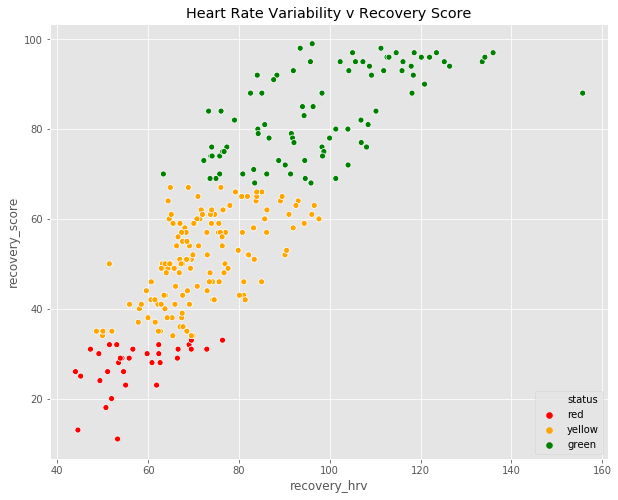

In [113]:
plt.style.use('ggplot')
plt.figure(figsize=(10,8))
hrv_ax = sns.scatterplot(
    x='recovery_hrv',
    y='recovery_score',
    data=recovery_metrics_df,
    hue='status', # the colours of the data points will include the status variable,
    palette=['red', 'orange', 'green'])
hrv_ax.set_title("Heart Rate Variability v Recovery Score")
plt.legend(loc='lower right')

Looks like there is a **positive (relatively linear) relationship** between the HRV and recovery score.

### RHR (resting heart rate) vs. Recovery Score
Now let's look at the relationship between resting heart rate and recovery score. I.e. is the resting heart rate a good indicator for how recovered you are.

Text(0.5, 1.0, 'Resting Heart Rate v Recovery Score')

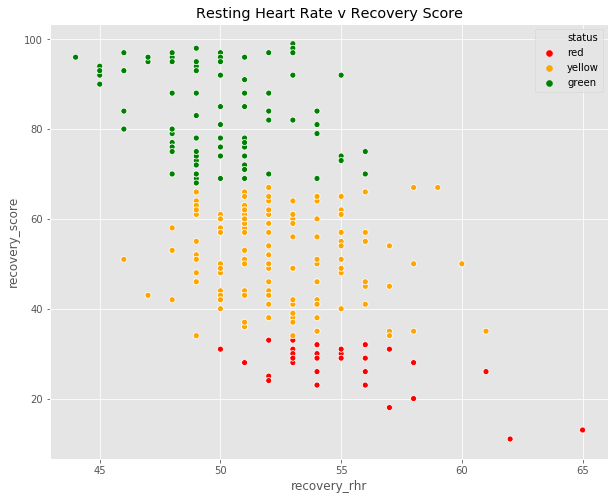

In [116]:
plt.figure(figsize=(10,8))
rhr_ax = sns.scatterplot(
    x='recovery_rhr',
    y='recovery_score',
    data=recovery_metrics_df,
    hue='status',
    palette=['red', 'orange', 'green']
)
rhr_ax.set_title("Resting Heart Rate v Recovery Score")
    

It looks like there is some (negative) correlation between resting heart rate and recovery. That is, the higher the resting heart rate, the less recovered I am. The relationship is much weaker than the **HRV vs. Recovery Score** plot above, but it seems like there is some sort of relationship nonetheless.

### Sleep score vs. Recovery Score
Finally, let's look at the relationship between sleep score and recovery score. Intuitively, if I'm better rested (by getting more of my total sleep need, as is defined here), I would expect my recovery score to be higher.

Text(0.5, 1.0, 'Sleep Score v Recovery Score')

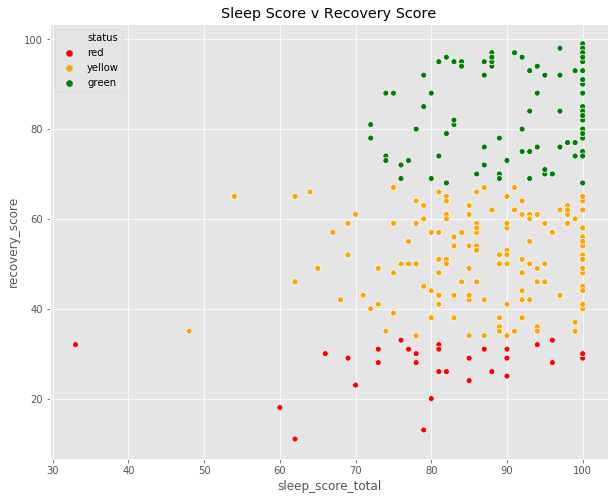

In [118]:
plt.figure(figsize=(10,8))
sleep_ax = sns.scatterplot(
    x='sleep_score_total',
    y='recovery_score',
    data=recovery_metrics_df,
    hue='status',
    palette=['red', 'orange', 'green']
)
sleep_ax.set_title("Sleep Score v Recovery Score")

Again it looks like there is a (somewhat) weak positive relationship between the **sleep_score_total** and the **recovery_score**.

## Basic data analysis
Before carrying out any machine learning methods/techniques, it helps to get a better idea of the data by visualising the features, firstly in a histogram.

In [119]:
params = {'axes.titlesize': '50',
          'xlabelsize': '20',
          'ylabelsize': '20'}

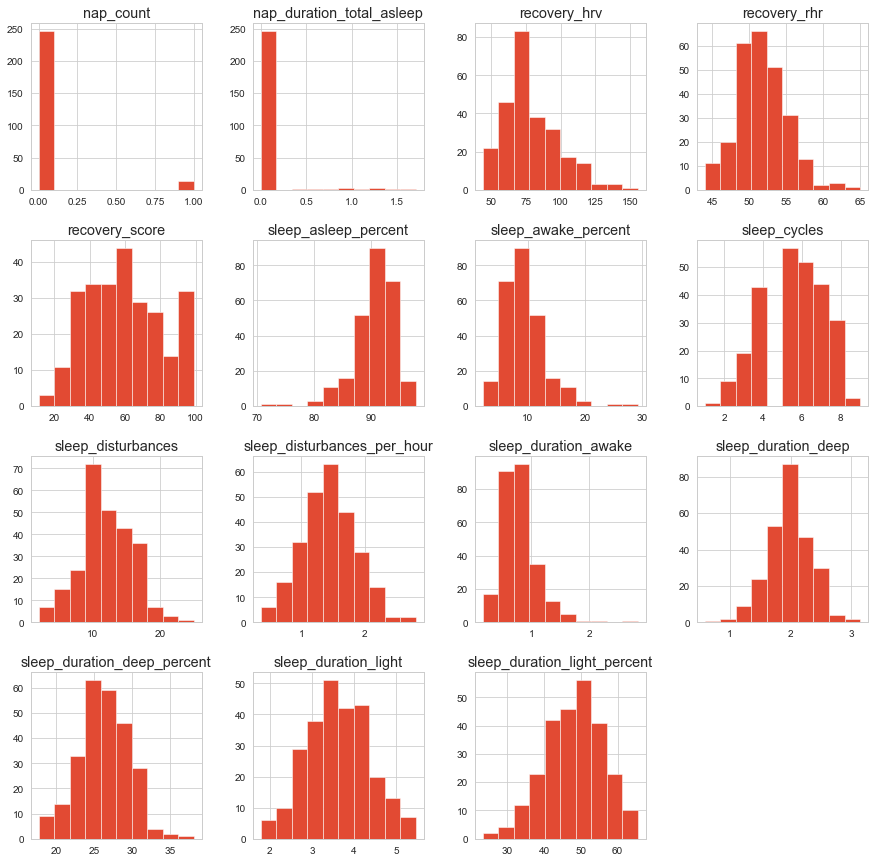

In [140]:
# there's lots of data, so split into two histograms
hist = df.iloc[:,:15].hist(bins=10, figsize=(15,15))

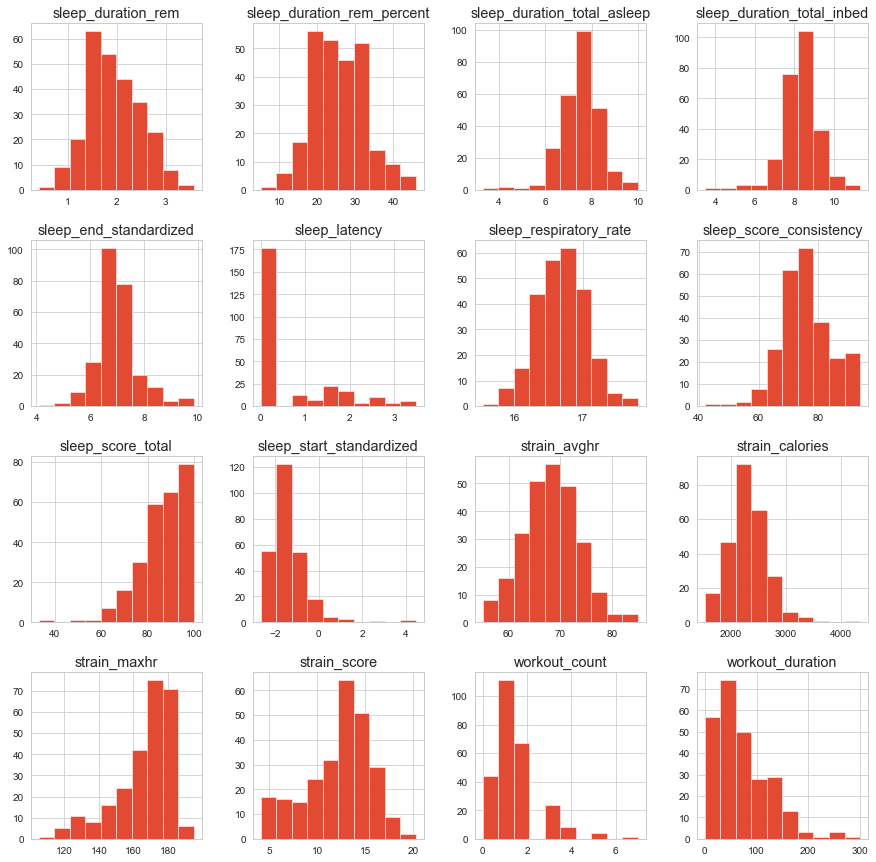

In [141]:
hist_two = df.iloc[:,15:].hist(bins=10, figsize=(15,15))

Observe that the discrete bars in the above histograms represent categorical variables, for example: 
- **sleep_cycles** (first plot)
- **workout_count** (second plot)

**Is there any correlation between features?**
Understanding if there is any correlation between features will be useful for feature selection. if any features are very highly correlated, it will allow us to reduce the number of features in the dataset.

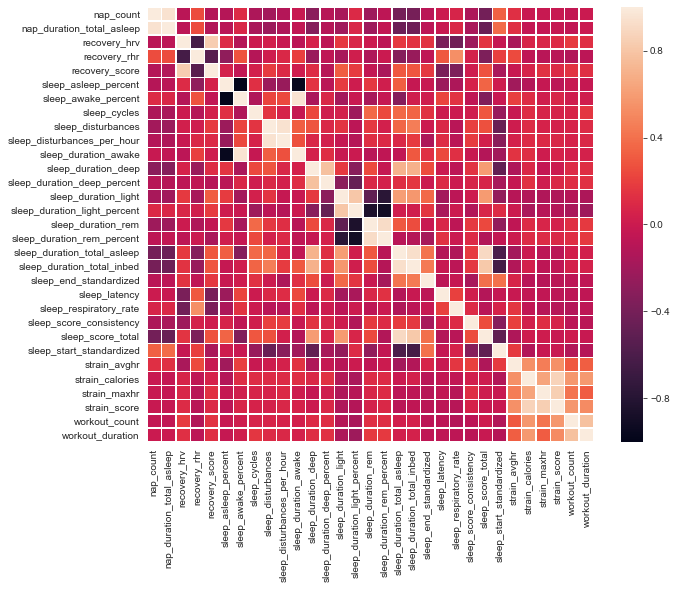

In [142]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=False, linewidths=0.3)
plt.show()

The results suggest there isn't a very tight correlation between features. 30 features is too many to analyse, so let's have a first pass and remove some, and run the model to assess it's performance.

In [143]:
df.columns

Index(['nap_count', 'nap_duration_total_asleep', 'recovery_hrv',
       'recovery_rhr', 'recovery_score', 'sleep_asleep_percent',
       'sleep_awake_percent', 'sleep_cycles', 'sleep_disturbances',
       'sleep_disturbances_per_hour', 'sleep_duration_awake',
       'sleep_duration_deep', 'sleep_duration_deep_percent',
       'sleep_duration_light', 'sleep_duration_light_percent',
       'sleep_duration_rem', 'sleep_duration_rem_percent',
       'sleep_duration_total_asleep', 'sleep_duration_total_inbed',
       'sleep_end_standardized', 'sleep_latency', 'sleep_respiratory_rate',
       'sleep_score_consistency', 'sleep_score_total',
       'sleep_start_standardized', 'strain_avghr', 'strain_calories',
       'strain_maxhr', 'strain_score', 'workout_count', 'workout_duration'],
      dtype='object')

If the output/target we are interested in is recovery, let's choose the: - recovery_score 
as our output label, an drop the other labels.
Further, see that **sleep_asleep_percent** and **sleep_awake_percent** are opposites of each other, so we only need to keep one. Further, for other sleep_duration measures, let's keep the absolute values rather than the percentage ones.

In [144]:
sleep_labels = [x for x in df.columns if 'sleep' in x.lower()] 
# 20 labels for sleep!
len(sleep_labels)

21

In [145]:
sleep_labels_subset = [x for x in sleep_labels if 'percent' not in x.lower()]

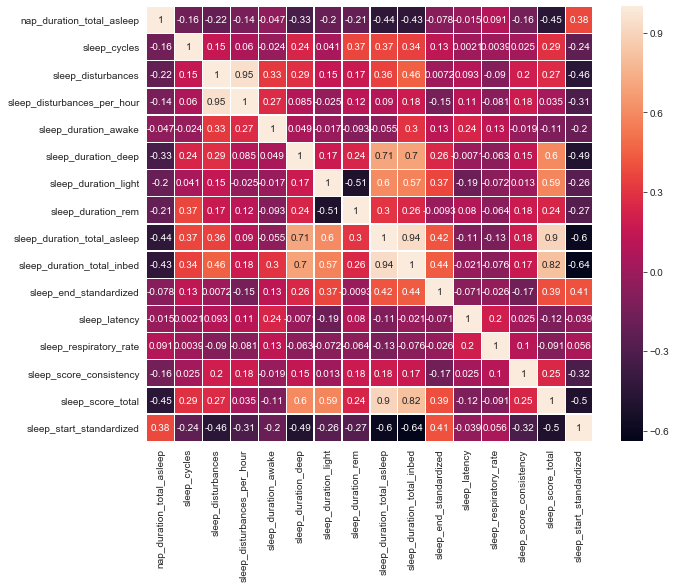

In [146]:
plt.figure(figsize=(10,8))
sns.heatmap(df[sleep_labels_subset].corr(), annot=True, linewidths=0.3)

- **sleep_disturbance_per_hour** seems to be similar to **sleep_disturbances**, so let's keep the former. 
- **sleep_latency** also seems to have a low correlation to all other variables, let's investigate a bit further the values of this label.

In [147]:
from scipy.stats import describe
describe(df['sleep_latency'])

DescribeResult(nobs=259, minmax=(0.0, 3.492733333333333), mean=0.5907629987129986, variance=0.9046336073325317, skewness=1.3460435227356262, kurtosis=0.5815151331564192)

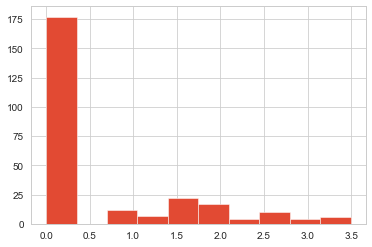

In [148]:
df['sleep_latency'].hist()

The values for sleep lantency seem to be very small, very close to zero, so we will drop this label from the data also.

We will cut the redundant/not useful labels from the data:
- **sleep_disturbances**
- **sleep_latency**.

Further, we will also include the labels for sleep that do not have _percent_ in them, as we have the absolute values. If needed we can derive the percentage values.

In [159]:
# labels to keep 
sleep_labels_to_keep = [x for x in sleep_labels_subset if 
                        (x != 'sleep_latency') or (x !='sleep_disturbances')]

In [167]:
strain_labels = [x for x in df.columns if 'strain' in x.lower()]
strain_labels

['strain_avghr', 'strain_calories', 'strain_maxhr', 'strain_score']

In [169]:
workout_labels = [x for x in df.columns if 'workout' in x.lower()]
workout_labels

['workout_count', 'workout_duration']

In [170]:
# join the label lists together
sleep_labels_to_keep + strain_labels + workout_labels

['nap_duration_total_asleep',
 'sleep_cycles',
 'sleep_disturbances',
 'sleep_disturbances_per_hour',
 'sleep_duration_awake',
 'sleep_duration_deep',
 'sleep_duration_light',
 'sleep_duration_rem',
 'sleep_duration_total_asleep',
 'sleep_duration_total_inbed',
 'sleep_end_standardized',
 'sleep_latency',
 'sleep_respiratory_rate',
 'sleep_score_consistency',
 'sleep_score_total',
 'sleep_start_standardized',
 'strain_avghr',
 'strain_calories',
 'strain_maxhr',
 'strain_score',
 'workout_count',
 'workout_duration']

In [173]:
cols_to_keep = sleep_labels_to_keep + strain_labels + workout_labels
print(f"Now have {len(cols_to_keep)} columns to keep in the dataset")

Now have 22 columns to keep in the dataset


In [174]:
filtered_data = df[sleep_labels_to_keep + strain_labels + workout_labels].copy(True)

Let's investigate the output label, **recovery_score**

Text(0.5, 1.0, 'Histogram of Output Label (recovery_score)')

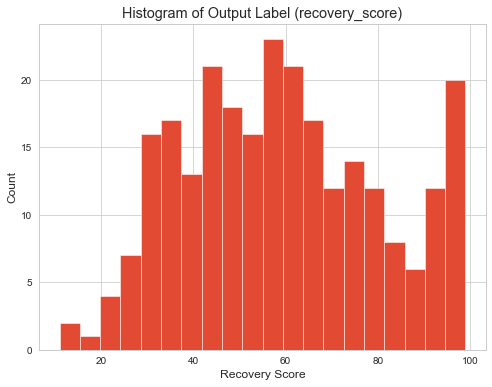

In [175]:
data['recovery_score'].hist(bins=20,
                           figsize=(8,6))
plt.xlabel("Recovery Score")
plt.ylabel("Count")
plt.title("Histogram of Output Label (recovery_score)")


The observation is that the data set is quite even for the output label.

## Machine Learning - Neural Network

Select the columns for prediction in the neural network

In [ ]:
X = data.drop('recovery_score', axis=1)
Y = data['recovery_score']

print(f"shape of input data {X.shape} \n")
print(f"shape of target data {Y.shape} \n")
print(f"All data columns {data.columns.values}")


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X=X, Y=Y, test_size=0.3, random_state=1, shuffle=True)